# Unit5作业

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import scipy.stats as stats
import numpy as np
import statsmodels.stats.proportion as proportion
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

#### HW-U5-1：对于Diabetes.csv数据，请利用协方差和pearson 相关系数分析Glucose与BloodPressure的关系 （0.5分）, 并画出血糖-血压散点图（0.5分）

In [19]:
diabetes=pd.read_csv('Diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


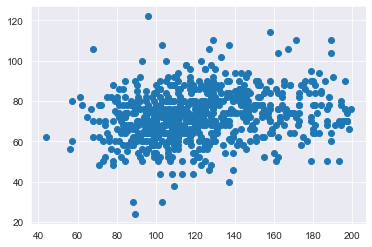

In [20]:
diabetes=diabetes[diabetes['Glucose']!=0]
diabetes=diabetes[diabetes['BloodPressure']!=0]
glu=diabetes['Glucose']
bp=diabetes['BloodPressure']
plt.scatter(glu,bp)

In [21]:
np.cov(glu,bp)
stats.pearsonr(glu,bp)

array([[941.21371888,  84.81198513],
       [ 84.81198513, 153.4157062 ]])

(0.223191778249542, 1.138581203805524e-09)

pearson's r$=0.22$,p$=1.14\times 10^{-9}.$该结果显示Glucose与BloodPressure之间没有明显的相关关系。

#### HW-5-2: 对于Titantic.csv数据（参见前面单元作业），请用分别用pearson r, spearman rho, kendall's tau分别计算乘客年龄与买的票的等级的相关系数 (1分）

In [22]:
titantic=pd.read_csv('Titanic.csv')
titantic.head(5)
titantic=titantic.dropna()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [23]:
age=titantic['Age']
pclass=titantic['PClass']
pclass=pclass.replace(['1st','2nd','3rd'],[1,2,3])

In [24]:
stats.pearsonr(age,pclass)
stats.spearmanr(age,pclass)
stats.kendalltau(age,pclass)

(-0.4141214595264922, 1.0969903610990536e-32)

SpearmanrResult(correlation=-0.39366216507025165, pvalue=1.9756955531661058e-29)

KendalltauResult(correlation=-0.3103724477828569, pvalue=8.600565143832718e-28)

以上三个结果的p-value均很小，均反映了Age与PClass之间没有显著的相关关系.

#### HW-5-3 : 针对汽车数据mtcars.csv

##### （1）画出wt~ mpg散点图；用简单线性回归分析mpg（因变量），和wt(自变量）的关系，并根据回归结果中的截距和斜率及其显著性水平（p值), 对结果进行解释； 并解释R-square.（1.5分）

In [25]:
df=pd.read_csv('mtcars.csv')
df.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


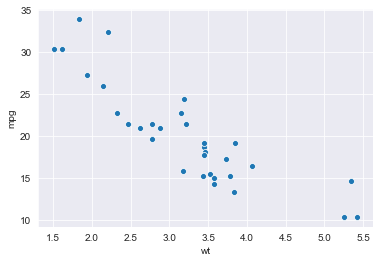

In [26]:
sns.scatterplot(x='wt',y='mpg',data=df)

In [27]:
result1=smf.ols('mpg~wt',data=df).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.29e-10
Time:                        20:04:26   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

回归结果$mpg=-5.3445wt+37.2851$，截距和斜率的p值均很小，说明截距和斜率均有显著意义.$R^2=0.753$说明mpg与wt之间有比较强的线性关系(strong).

##### （2）用多元线性回归分析mpg（因变量），和wt(自变量）、hp(自变量）的关系，并根据回归结果中的各个自变量的系数及其显著性水平（p值), 对回归结果进行解释； 并解释R-square （1.5分）

In [28]:
result2=smf.ols('mpg~wt+hp',data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 19 May 2020   Prob (F-statistic):           9.11e-12
Time:                        20:04:26   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

回归结果$mpg=-3.8778wt-0.0318hp+37.2273$，三个系数的p值均小于0.05，说明结果具有显著意义。mpg与wt和hp都成负相关，但且wt对mpg的影响要高于hp。$R^2=0.827$,说明mpg与wt和hp之间有很强的二元线性关系。相比单变量回归，$R^2$值提高了，结合$Adj-R^2$，也没有出现明显的过拟合现象，因此模型较单变量效果更好。

#### HW-5-4：mtcars.csv 数据），汽车的离合（am: 手动（1）/自动（0））与汽车的油耗（mpg)，马力（hp)是很相关的，请：

##### （1）基于全部数据用mpg, hp作为自变量，am作为因变量，建立对应的逻辑回归模型 ，并作出解释 (1.0分）

In [29]:
log_res=smf.logit('am~mpg+hp',data=df).fit()
log_res.summary()

Optimization terminated successfully.
         Current function value: 0.300509
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     am   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.5551
Time:                        20:04:26   Log-Likelihood:                -9.6163
converged:                       True   LL-Null:                       -21.615
Covariance Type:            nonrobust   LLR p-value:                 6.153e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.6052     15.077     -2.229      0.026     -63.156      -4.055
mpg            1.2596      0.567      2.220      0.026       0.147       2.372
hp             0.0550      0.027      2.045      0.041       0.002       0.108
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

mpg和hp的p值均小于0.05，说明这两者与am均有关联，且mpg在其中占的比重更大。

##### 附加题：（2）将前20条记录作为训练数据，重新建立上面的逻辑回归模型，然后用后12条记录作为测试数据，再对该模型进行测试，并对结果作出解释。

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=12/32)
###Normalization
# Assuming same lines from your example
cols_to_norm = "mpg","hp"
train[cols_to_norm] = train[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

KeyError: 'mpg'

In [31]:
model=smf.logit('am~mpg+hp',data=train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.210510
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     am   No. Observations:                   20
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.6941
Time:                        20:04:26   Log-Likelihood:                -4.2102
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                 7.102e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8711      1.363      1.373      0.170      -0.800       4.542
mpg           11.8868      6.970      1.705      0.088      -1.774      25.547
hp             5.6484      3.435      1.644      0.100      -1.084      12.381
==============================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
trainingRes=pd.DataFrame(model.pred_table())
trainingRes.columns=["Predicted Outcome 0","Predicted Outcome 1"]
trainingRes=trainingRes.rename(index={0:"Actual Outcome 0", 1:"Actually Outcome 1"})
trainingRes
print("The accuracy for the train data is :",(trainingRes.iloc[1,1]+trainingRes.iloc[0,0])/20)

,Predicted Outcome 0,Predicted Outcome 1
Actual Outcome 0,8.0,1.0
Actually Outcome 1,1.0,10.0


The accuracy for the train data is : 0.9


In [33]:
pred_values = model.predict(test)
bins=np.array([0,0.5,1])
cm = np.histogram2d(test['am'], pred_values, bins=bins)[0]
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
print("The prediction accuracy for the test data is :", accuracy)

testRes=pd.DataFrame(cm)
testRes.columns=["Predicted Outcome 0","Predicted Outcome 1"]
testRes=testRes.rename(index={0:"Actual Outcome 0", 1:"Actually Outcome 1"})
testRes

The prediction accuracy for the test data is : 0.6666666666666666


,Predicted Outcome 0,Predicted Outcome 1
Actual Outcome 0,6.0,4.0
Actually Outcome 1,0.0,2.0


从拟合的模型来看，由于训练集较之前规模减小$(32->20)$，因此模型精确度有所下降，三个p值均较大，可能存在一定的欠拟合情况。但从结果来看模型效果还不错，训练集的正确率为0.8，测试集的准确率有0.917。